In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LWFA():
    
    def __init__(self,z0,omega=2):
        
        D = {}
        D['e'] = 1
        D['m'] = 1
        D['omega'] = omega
        D['omega_0'] = 1
        D['k'] = 1
        D['z0'] = z0
        D['x'] = 0
        self.D = D

    def x(self,E,t,z):
        
        D = self.D
        
        w = D['omega']
        w0 = D['omega_0']
        
        x = D['e']/(D['m']*(w**2-w0**2)) * E
        
        return x

From source [sp mangels] we find that the wave packets they used had a width of 35 fs. Knowing this we construct a wave packet with width of sigma_z = c*tou ( tou = 35 fs)

to encapsulate the entire region we extend the width of the entire region to 6 sigma to hold ~ 99.7% attentuation

In [3]:
class region():
    def __init__(self,name,N = 50):
        self.name = name
        self.width = 6 * 3*10**8 * 35*10**(-15)
        self.N = N
        self.dz = self.width / self.N
        self.c = 3*10**8
        
        # establish a list of electrons, append N electrons and update their positions
        self.electrons = []
        [self.electrons.append(LWFA(-self.width/2 + self.dz * i)) for i in np.arange(self.N)]
        [self.electrons[i].x(0,0,self.dz * i) for i in np.arange(self.N)] #calculate electron positions
        self.positions = -self.width/2.0 + self.dz * np.arange(self.N)  #create a vector holding the positions of all the electrons
        self.amplitudes = np.zeros(self.N)   #creates an amplitude storage vector
        
        #establish the 'amplitude' of positive ions (they're in the same orginal places as the electons)
        self.proton_amp = np.zeros(self.N)
        
    def wave(self,w,z,t):
        sigma = self.c * 35*10**(-15)
        exponent = z**2 / (2 * sigma**2)
        E = np.exp(-exponent)*np.cos(w*(z - t))
        return E
    
    def update_x(self):
        for i in np.arange(self.N):
            z = self.positions[i]
            t = 0
            w = np.linspace(-np.pi/2,np.pi/2,3)
            E = 0
            for j in w:
                E += self.wave(j,z,t)
            self.amplitudes[i] =(-1)**i * self.electrons[i].x(E,t,z)
            


In [4]:
region1 = region('region1')
region1.update_x()

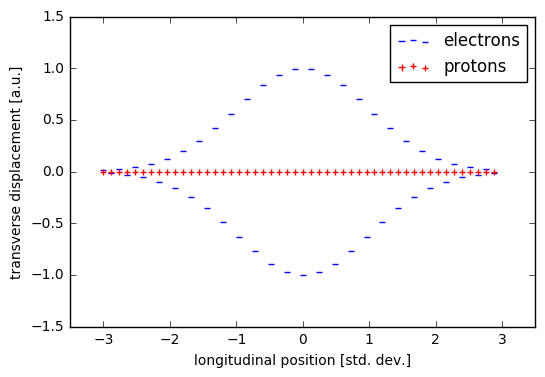

In [502]:
fig = plt.figure('charge dist')
hold = True
sigma = region1.c * 35*10**(-15)
plt.xlim([-3.5,3.5])
plt.scatter(region1.positions/sigma, region1.amplitudes, color='b', marker='_', label = 'electrons')
plt.scatter(region1.positions/sigma, region1.proton_amp, color='r', marker='+', label = 'protons')
plt.legend()
plt.ylabel('transverse displacement [a.u.]')
plt.xlabel('longitudinal position [std. dev.]')
plt.show()

The plot above represents the distribution of electrons for a gaussian wave packet that has been fully immersed in the plasma. This snapshot in time displaces the amplitude of displacement for electrons placed along the z-axis at x = 0

In [643]:
class elec:
    def __init__(self,positions,amplitudes):
        self.xpos = positions
        self.ypos = amplitudes
        self.pos = np.array([self.xpos[5],0])
        self.vel = np.array([0.0,0.0])
        self.acc = np.array([0.0,0.0])
        self.pos_old = np.array([0.0,0.0])
        self.vel_old = np.array([0.0,0.0])
        self.acc_old = np.array([0.0,0.0])
        self.mass = 9.11*10**(-31) #kg
    def update(self):
        self.pos_old = self.pos
        self.vel_old = self.vel
        self.acc_old = self.acc
######################################
def accel(particle,region):
    ax = 0
    ay = 0
    
    x = region.positions/sigma
    y = region.amplitudes/sigma
    
    x0 = particle.pos[0]/sigma
    y0 = particle.pos[1]/sigma
    
    dx = (x - x0)
    dy = (y - y0)
    
    r = (dx**2 + (dy)**2)**(1/2)
    
    for i in np.arange(region1.N):
        ay += dy[i] / r[i]**3
        if dx[i] == 0:
            ax += 0
        else:  
            ax += (-dx[i]/(np.abs(dx[i]))**3 + dx[i]/r[i]**3)
    print('acc',ax*10**9,ay*10**9)
    return np.array([-ax*10**(9),-ay*10**9])

In [647]:
electron = elec(region1.positions/sigma,region1.amplitudes)
electron.acc = accel(electron,region1)
time = 100
dt = 1/time
xvec = []
yvec = []
for t in np.arange(0,time):
    electron.update()
    xvec.append(electron.pos_old[0])
    yvec.append(electron.pos_old[1])
    
    electron.pos = electron.pos_old + dt * electron.vel_old
    electron.acc = accel(electron,region1)
    electron.vel = electron.vel_old + electron.acc_old * dt
    #print('vel',electron.vel)

acc -0.0639228748204 -1.58279304426e-05
acc -0.0639228748204 -1.58279304426e-05
acc -0.0639235114657 -1.58285725791e-05
acc -0.0639247847798 -1.58298568779e-05
acc -0.0639266948161 -1.58317834129e-05
acc -0.0639292416578 -1.5834352306e-05
acc -0.063932425418 -1.58375637274e-05
acc -0.0639362462395 -1.58414178949e-05
acc -0.0639407042953 -1.58459150748e-05
acc -0.0639457997881 -1.58510555814e-05
acc -0.0639515329506 -1.58568397773e-05
acc -0.0639579040454 -1.58632680731e-05
acc -0.0639649133651 -1.58703409278e-05
acc -0.0639725612324 -1.58780588489e-05
acc -0.0639808479998 -1.5886422392e-05
acc -0.0639897740503 -1.58954321615e-05
acc -0.0639993397966 -1.590508881e-05
acc -0.0640095456818 -1.59153930391e-05
acc -0.0640203921791 -1.5926345599e-05
acc -0.0640318797921 -1.59379472885e-05
acc -0.0640440090546 -1.59501989557e-05
acc -0.0640567805309 -1.59631014976e-05
acc -0.0640701948155 -1.59766558602e-05
acc -0.0640842525337 -1.59908630391e-05
acc -0.0640989543411 -1.60057240791e-05
acc -0

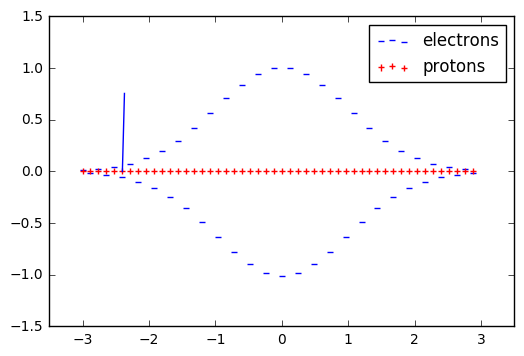

In [648]:
for i in np.arange(len(yvec)):
    yvec[i] = yvec[i]/sigma
plt.figure('charge dist')
plt.hold(True)
plt.plot(xvec,yvec)
plt.xlim([-3.5,3.5])
plt.scatter(region1.positions/sigma, region1.amplitudes/np.max(region1.amplitudes), color='b', marker='_', label = 'electrons')
plt.scatter(region1.positions/sigma, region1.proton_amp, color='r', marker='+', label = 'protons')
plt.legend()
plt.show()

In [649]:
[print(xvec[i],'|',yvec[i]) for i in np.arange(len(xvec))];

-2.4 | 0.0
-2.4 | 0.0
-2.39999360771 | 0.000150742194691
-2.39998082314 | 0.000452226584074
-2.39996164621 | 0.000904459283734
-2.39993607681 | 0.00150745252509
-2.39990411473 | 0.00226122465609
-2.39986575973 | 0.00316580014238
-2.39982101149 | 0.00422120956894
-2.39976986963 | 0.00542748964211
-2.39971233369 | 0.00678468319219
-2.39964840318 | 0.00829283917638
-2.39957807751 | 0.00995201268225
-2.39950135605 | 0.0117622649317
-2.3994182381 | 0.0137236632852
-2.39932872289 | 0.0158362812468
-2.3992328096 | 0.0181001984692
-2.39913049733 | 0.0205155007599
-2.39902178513 | 0.0230822800868
-2.39890667197 | 0.0258006345856
-2.39878515677 | 0.0286706685662
-2.39865723839 | 0.0316924925211
-2.3985229156 | 0.0348662231326
-2.39838218714 | 0.0381919832822
-2.39823505165 | 0.0416699020591
-2.39808150774 | 0.0453001147697
-2.39792155394 | 0.0490827629476
-2.39775518871 | 0.0530179943644
-2.39758241044 | 0.05710596304
-2.39740321749 | 0.0613468292542
-2.39721760811 | 0.0657407595587
-2.397025580